In [5]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [6]:
(X_train,y_train), (X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 4s 0us/step


In [7]:
len(X_train)

60000

In [8]:
len(X_test)

10000

In [10]:
X_train[0].shape

(28, 28)

In [11]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

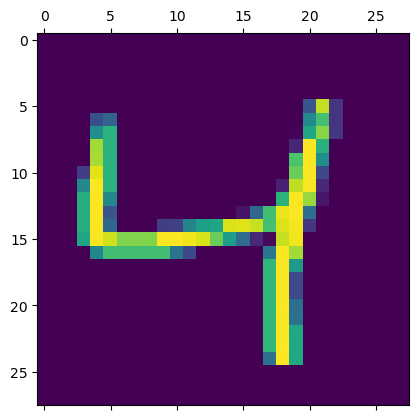

In [12]:
plt.matshow(X_train[2])

In [13]:
y_train[2]

4

In [14]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [25]:
X_train=X_train/255
X_test=X_test/255


#  Flattening 


In [26]:
X_train.shape   # 28* 28 each image size

(60000, 28, 28)

In [27]:
X_train_flattended=X_train.reshape(len(X_train),28*28)
X_train_flattended.shape

(60000, 784)

In [28]:
X_test_flattended=X_test.reshape(len(X_test),28*28)
X_test_flattended.shape

(10000, 784)

In [29]:
X_train_flattended[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# Create a simple neural netwrok

In [31]:
model=keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid') 
                                                      #Sequential- stack of neural networks, every layer as one element
])                                             # Dense- i/p layers connected with every other neuron on the second layers 
                                               #10- output shape # input -784
    
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )
model.fit(X_train_flattended,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4702 - accuracy: 0.8779
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3045 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2832 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2730 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2667 - accuracy: 0.9266


In [32]:
model.evaluate(X_test_flattended,y_test)

313/313 [==============================] - 2s 2ms/step - loss: 0.2670 - accuracy: 0.9279


[0.26703259348869324, 0.9279000163078308]

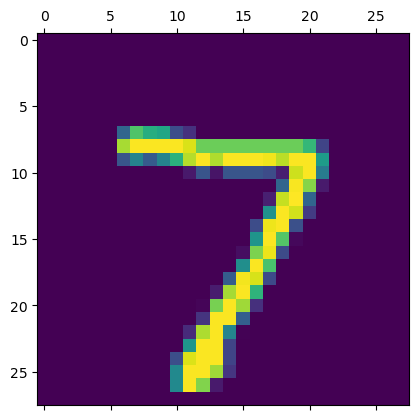

In [34]:
plt.matshow(X_test[0])

In [35]:
y_predicted=model.predict(X_test_flattended)
y_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([2.3909828e-02, 3.9458121e-07, 6.8787791e-02, 9.6225488e-01,
       2.6086024e-03, 1.5103841e-01, 1.7284252e-06, 9.9985141e-01,
       1.1002611e-01, 6.5698838e-01], dtype=float32)

In [36]:
#look at the maximum score

np.argmax(y_predicted[0])

7

In [37]:
y_predicted[1]

array([5.3312051e-01, 6.6120122e-03, 9.9923098e-01, 2.6800933e-01,
       4.6879844e-10, 8.8867444e-01, 8.9453715e-01, 8.9962423e-13,
       1.4030038e-01, 2.8539917e-09], dtype=float32)

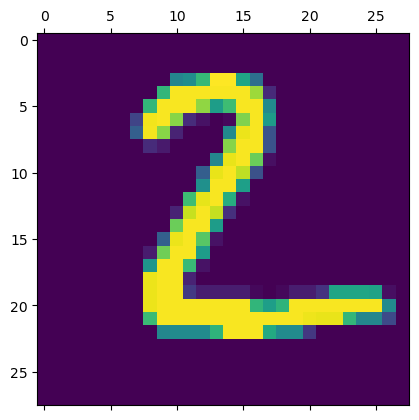

In [40]:
plt.matshow(X_test[1])

In [38]:
y_predicted=model.predict(X_test_flattended)
y_predicted[1]

313/313 [==============================] - 1s 2ms/step


array([5.3312051e-01, 6.6120122e-03, 9.9923098e-01, 2.6800933e-01,
       4.6879844e-10, 8.8867444e-01, 8.9453715e-01, 8.9962423e-13,
       1.4030038e-01, 2.8539917e-09], dtype=float32)

In [39]:
#look at the maximum score

np.argmax(y_predicted[1])

2

In [42]:
y_predicted_labels=[np.argmax(i)for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [41]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [43]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    1,    2,    0,    5,    6,    3,    1,    0],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   4,    9,  930,   13,    8,    4,   13,   10,   38,    3],
       [   4,    0,   19,  916,    0,   28,    3,   13,   21,    6],
       [   1,    1,    2,    3,  925,    0,   15,    4,   11,   20],
       [  10,    3,    3,   27,    9,  783,   18,    7,   27,    5],
       [  10,    3,    6,    1,    7,   11,  917,    2,    1,    0],
       [   1,    6,   22,    6,    6,    0,    0,  962,    2,   23],
       [   5,    7,    7,   21,    9,   26,   10,   13,  872,    4],
       [  11,    7,    1,   11,   32,    8,    0,   32,    7,  900]])>

Text(95.72222222222221, 0.5, 'Truth')

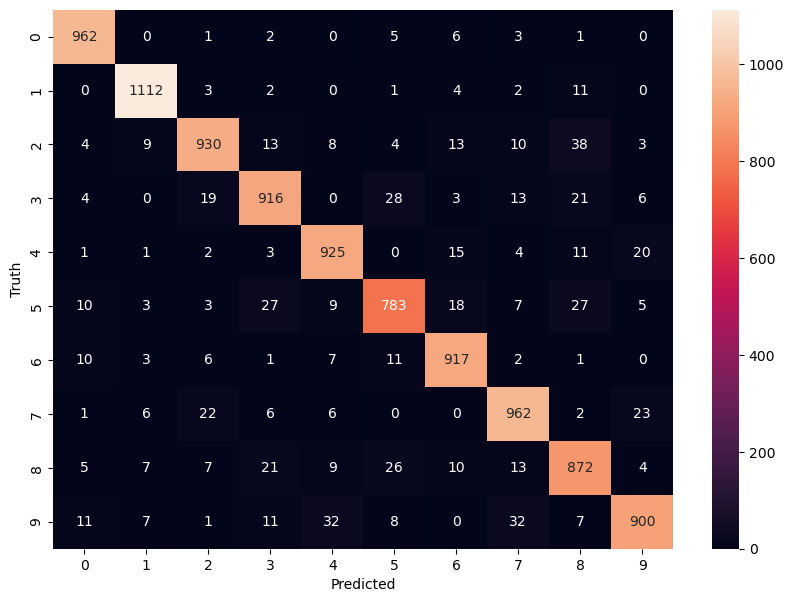

In [46]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Add hidden layer

In [47]:
model=keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
                                                      #Sequential- stack of neural networks, every layer as one element
])                                             # Dense- i/p layers connected with every other neuron on the second layers 
                                               #10- output shape # input -784
    
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )
model.fit(X_train_flattended,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2727 - accuracy: 0.9224
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1246 - accuracy: 0.9641
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0866 - accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0656 - accuracy: 0.9806
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0522 - accuracy: 0.9841


In [49]:
model.evaluate(X_test_flattended,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0802 - accuracy: 0.9749


[0.08015222102403641, 0.9749000072479248]

In [51]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    1,    2,    0,    5,    6,    3,    1,    0],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   4,    9,  930,   13,    8,    4,   13,   10,   38,    3],
       [   4,    0,   19,  916,    0,   28,    3,   13,   21,    6],
       [   1,    1,    2,    3,  925,    0,   15,    4,   11,   20],
       [  10,    3,    3,   27,    9,  783,   18,    7,   27,    5],
       [  10,    3,    6,    1,    7,   11,  917,    2,    1,    0],
       [   1,    6,   22,    6,    6,    0,    0,  962,    2,   23],
       [   5,    7,    7,   21,    9,   26,   10,   13,  872,    4],
       [  11,    7,    1,   11,   32,    8,    0,   32,    7,  900]])>

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

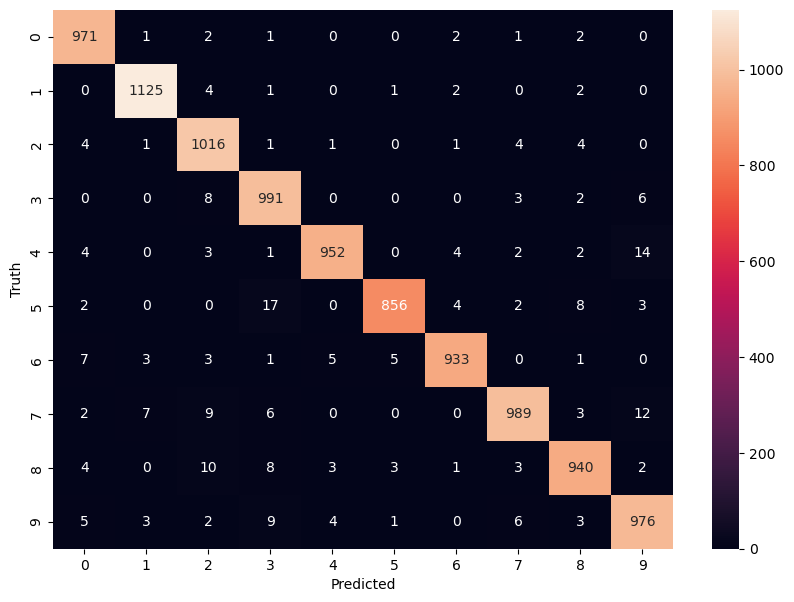

In [53]:
y_predicted=model.predict(X_test_flattended)
y_predicted_labels=[np.argmax(i) for i in y_predicted]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
# If i don`t want to add 

In [54]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
                                                      #Sequential- stack of neural networks, every layer as one element
])                                             # Dense- i/p layers connected with every other neuron on the second layers 
                                               #10- output shape # input -784
    
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2769 - accuracy: 0.9219
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1235 - accuracy: 0.9638
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0854 - accuracy: 0.9745
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0648 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0503 - accuracy: 0.9852


In [ ]:
#Assignment - try with different loss functions